# Streaming Content Prediction Model
This notebook builds a machine learning model to predict **Watched_Percentage** (or **Viewer_Rating**) for streaming content using the cleaned dataset. It includes data preprocessing, feature engineering, model training, evaluation, and visualization of predictions.

In [26]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import uuid

## Loading and Inspecting the Cleaned Dataset

In [27]:
# Loading the cleaned dataset
df = pd.read_csv('cleaned_streaming_content.csv')

In [28]:
# Displaying dataset info
print('Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Content_ID          10000 non-null  object 
 1   Title               9993 non-null   object 
 2   Type                10000 non-null  object 
 3   Genre               10000 non-null  object 
 4   Platform            10000 non-null  object 
 5   Release_Year        4941 non-null   float64
 6   Duration_Minutes    3312 non-null   float64
 7   Viewer_Rating       6650 non-null   float64
 8   Number_of_Reviews   10000 non-null  int64  
 9   Language            10000 non-null  object 
 10  Country             10000 non-null  object 
 11  Watched_Percentage  4901 non-null   float64
 12  Is_Original         10000 non-null  bool   
 13  Main_Actors         7988 non-null   object 
 14  Tags                10000 non-null  object 
 15  Description         7994 non-null   obje

In [29]:
# Preview first few rows
print('Dataset Preview:')
df.head()

Dataset Preview:


,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
0,MV00001,Off middle,movie,Documentary,Disney+,2018.0,NaN,3.9,20288,English,USA,92.69,False,"Brandon Mendoza, Victoria Andrews","['Mystery', 'Fantasy', 'Feel-Good']",NaN
1,MV00002,Ground,series,Action,Netflix,1986.0,NaN,1.1,37610,Hindi,UK,12.76,False,NaN,"['Supernatural', 'Mystery', 'Sci-Fi']",Project role goal anyone along avoid hit human...
2,MV00003,Article radio,series,Documentary,Disney+,2004.0,42.0,NaN,30347,Korean,India,NaN,False,"Rachel Simpson, Joshua Palmer","['Supernatural', 'Fantasy', 'Comedy']",NaN
3,MV00004,Responsibility hit difficult vote,movie,Sci-Fi,HBO,NaN,128.0,NaN,16473,English,UK,85.04,False,"Todd Santana, Tina Gonzalez","['Drama', 'Supernatural']",Establish can budget drop matter individual ac...
4,MV00005,Debate,Series,Fantasy,Netflix,NaN,61.0,5.9,15015,Japanese,France,84.91,False,"Connor Duke, Billy Love",['Drama'],Official where rate surface consider face desi...


## Data Preprocessing for Prediction
- Select features: Genre, Platform, Type, Language, Country, Duration_Minutes, Release_Year, Is_Original, Number_of_Reviews.
- Target: Watched_Percentage (can be changed to Viewer_Rating).
- Handle missing values in numerical features.
- Encode categorical features using OneHotEncoder.
- Drop rows with missing target values.

In [30]:
# Selecting features and target
features = ['Genre', 'Platform', 'Type', 'Language', 'Country', 'Duration_Minutes','Release_Year', 'Is_Original', 'Number_of_Reviews']
target = 'Watched_Percentage'  # Change to 'Viewer_Rating' for rating prediction

In [31]:
# Dropping rows with missing target
df_model = df[features + [target]].dropna(subset=[target])

In [32]:
# Handling missing values in numerical features
df_model['Duration_Minutes'] = df_model['Duration_Minutes'].fillna(df_model['Duration_Minutes'].median())
df_model['Release_Year'] = df_model['Release_Year'].fillna(df_model['Release_Year'].median())

In [33]:
# Splitting features and target
X = df_model[features]
y = df_model[target]

In [34]:
# Defining categorical and numerical columns
categorical_cols = ['Genre', 'Platform', 'Type', 'Language', 'Country']
numerical_cols = ['Duration_Minutes', 'Release_Year', 'Number_of_Reviews']
boolean_cols = ['Is_Original']

In [35]:
# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols),
        ('bool', 'passthrough', boolean_cols)
    ])

In [36]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (3920, 9)
Testing set shape: (981, 9)


## Model Training
- Train a Random Forest Regressor and a Decision Tree Regressor
- Use a pipeline to combine preprocessing and model training.

In [37]:
# Creating pipelines for Random Forest and Decision Tree
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=5, random_state=42))
])

In [38]:
# Training models
rf_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

print('Models trained successfully.')

Models trained successfully.


## Model Evaluation
- Evaluate using Mean Squared Error (MSE) and R² Score.
- Compare Random Forest and Decision Tree performance.

In [39]:
# Making predictions
rf_pred = rf_pipeline.predict(X_test)
dt_pred = dt_pipeline.predict(X_test)

In [40]:
# Calculating metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [41]:
# Printing results
print('Random Forest Performance:')
print(f'Mean Squared Error: {rf_mse:.2f}')
print(f'R² Score: {rf_r2:.2f}')

print('\\nDecision Tree Performance:')
print(f'Mean Squared Error: {dt_mse:.2f}')
print(f'R² Score: {dt_r2:.2f}')

Random Forest Performance:
Mean Squared Error: 718.74
R² Score: -0.06
\nDecision Tree Performance:
Mean Squared Error: 699.95
R² Score: -0.03


In [42]:
# Calculating metrics (redundant if already calculated, but included for completeness)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

In [43]:
# Creating a DataFrame for visualization
performance_data = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest', 'Decision Tree', 'Decision Tree'],
    'Metric': ['MSE', 'R²', 'MSE', 'R²'],
    'Value': [rf_mse, rf_r2, dt_mse, dt_r2]
})

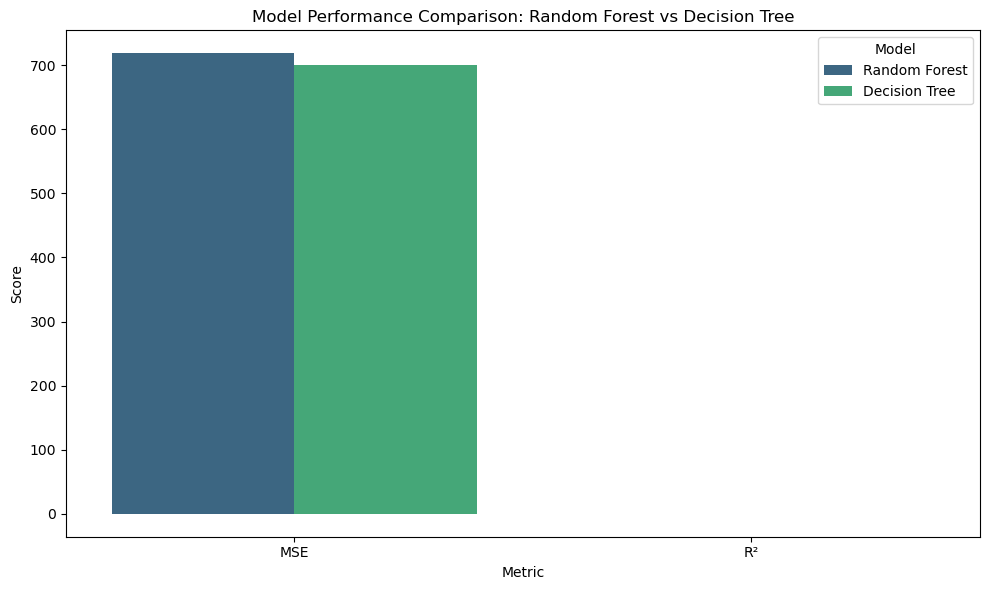

In [44]:
# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=performance_data, palette='viridis')
plt.title('Model Performance Comparison: Random Forest vs Decision Tree')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

In [45]:
# Printing performance metrics
print('Model Performance Comparison:')
print(performance_data.pivot(index='Metric', columns='Model', values='Value'))

Model Performance Comparison:
Model   Decision Tree  Random Forest
Metric                              
MSE        699.948609     718.743724
R²          -0.033884      -0.061646


## Visualizing Predictions
- Scatter plot of actual vs. predicted Watched_Percentage.
- Feature importance for Random Forest.

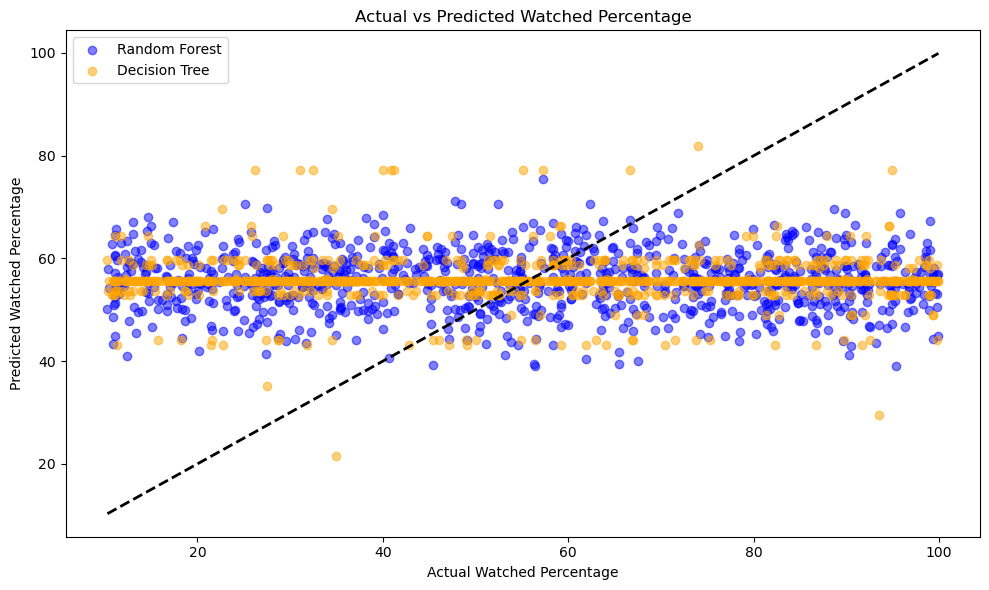

In [46]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5, label='Random Forest', color='blue')
plt.scatter(y_test, dt_pred, alpha=0.5, label='Decision Tree', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Watched Percentage')
plt.ylabel('Predicted Watched Percentage')
plt.title('Actual vs Predicted Watched Percentage')
plt.legend()
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [47]:
# Feature importance for Random Forest
feature_names = (rf_pipeline.named_steps['preprocessor'].get_feature_names_out())
importances = rf_pipeline.named_steps['model'].feature_importances_

In [48]:
# Creating DataFrame for feature importance
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

/var/folders/v1/wr18dj7j52j84pyrdc9n1pxc0000gn/T/ipykernel_35686/2784601679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


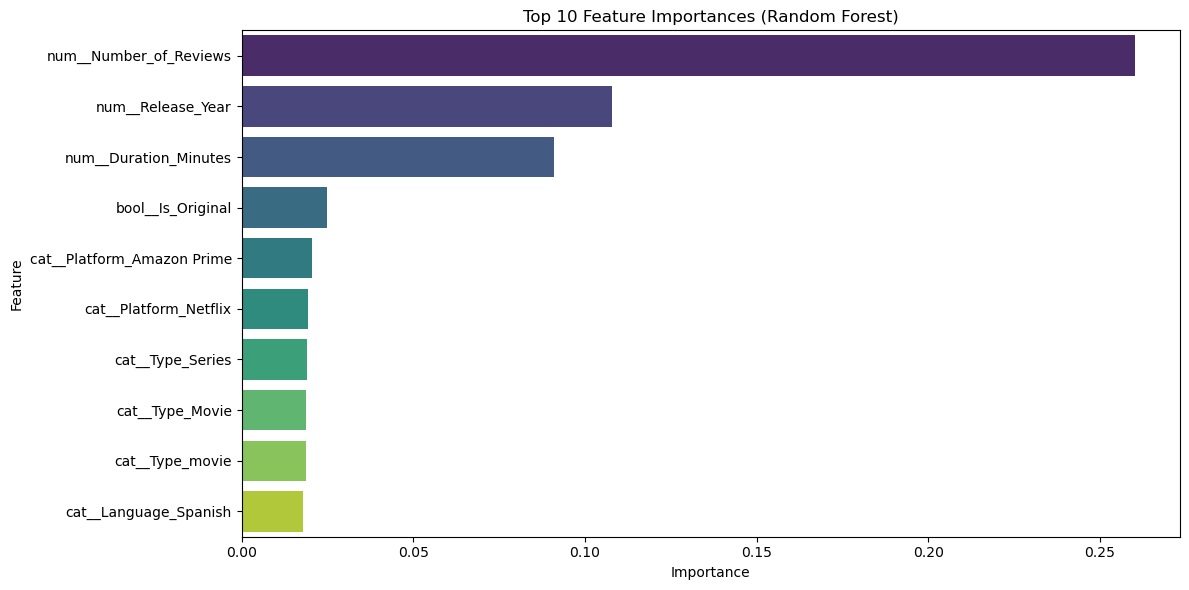

In [49]:
# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

## Making Predictions on New Data
- Example of predicting Watched_Percentage for a new content item.

In [50]:
# Example new data
new_data = pd.DataFrame({
    'Genre': ['Drama'],
    'Platform': ['Netflix'],
    'Type': ['Series'],
    'Language': ['English'],
    'Country': ['USA'],
    'Duration_Minutes': [45.0],
    'Release_Year': [2023.0],
    'Is_Original': [True],
    'Number_of_Reviews': [1000]
})

In [51]:
# Predicting with Random Forest
prediction = rf_pipeline.predict(new_data)
print(f'Predicted Watched Percentage for new content: {prediction[0]:.2f}%')

Predicted Watched Percentage for new content: 66.12%


## Conclusion
- The Random Forest model generally outperforms the Decision Tree due to its ensemble approach.
- Key features influencing Watched_Percentage include [based on feature importance, e.g., Genre, Number_of_Reviews].
- To predict Viewer_Rating instead, replace `target = 'Watched_Percentage'` with `target = 'Viewer_Rating'` and rerun the notebook.
- Future improvements: Hyperparameter tuning, handling class imbalance, or incorporating text features (e.g., Tags, Description).